optimal j: 2
mean estimate: 0.21676300578034682
mean estimate: 0.4928366762177648
mean estimate: 0.7484148307361623
total reward earned: 7211.0
overall win rate: 0.7211
num_times_explored: 1014
num_times_exploited: 8986
num times selected optimal bandit: 9305


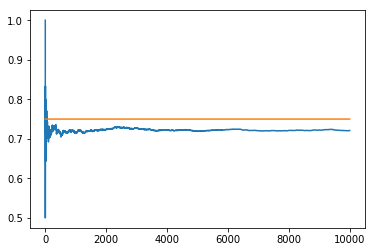

In [12]:
import matplotlib.pyplot as plt
import numpy as np


NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class BanditArm:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


def choose_random_argmax(a):
    idx = np.argwhere(np.amax(a) == a).flatten()
    return np.random.choice(idx)


def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = choose_random_argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

    # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

    # update rewards log
        rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    

  # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

  # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == "__main__":
    experiment()